#### MA124 Maths by Computer
# Project: Modelling in Epidemiology

#### Background
Epidemiological models are increasingly used during infectious disease outbreaks to make outbreak projections and to guide control interventions. This project involves developing simple computational models of outbreaks and using them to predict the effects of different interventions. It also involves using stochastic epidemiological models (models that include randomness) to predict the risk that early cases at the beginning of an outbreak lead on to a major epidemic (with a large number of cases) as opposed to fade out as a minor outbreak (with a small number of cases). 

If more details are required about the background epidemiological modelling theory, please rewatch the Epidemiology Lecture, available on the MA124 moodle page.

#### Structure of project
There are six tasks in the document below, tasks A1-A5 and then task B1. Your group should do all six of these tasks. Tasks A1-A5 are worth approximately 60% of the credit for this submission and task B1 is worth the rest (approximately 40%).

#### Notes about submission
Read through the document **MA124 Maths by Computer Tutor Group Projects Information for Students.pdf** on the MA124 Moodle page.

Before submitting see the notes at the end of this document.

#### Allowed libraries for this project 
Python libraries/modules should be used as required to complete the tasks in this project, with no restrictions.

## Section A (worth approximately 60% of the marks)

## The Deterministic SIR model

In the Epidemiology lecture, you met the deterministic SIR model given by a system of three ODEs.

This part of the assignment builds on the "Epidemiology I code" notebook, which provides code for numerically solving the SIR model in Python. We are interested in extensions to the SIR model as presented there: specifically, extensions involving public health measures such as vaccination and social distancing.

Note: You are expected to add code and markdown cells to this document as appropriate to provide your responses to the tasks. However, throughout this assignment, please do use the deterministic and stochastic SIR model codes from the Epidemiology I and Epidemiology II code notebooks as required (i.e., you are supposed to copy that code across and adapt it, rather than start coding from scratch).

---

# Epidemiology Project 

## Introduction
Epidemiology is the study of health-related events in people and communities, investigating why diseases are more common in certain groups than others, and applying this knowledge to control and prevent further health problems. 

The main ways of modelling epidemiology are deterministic and stochastic models, both models will be covered in this project. The key difference between these models is that deterministic models have no element of randomness and always give exact, predicted outcomes. Stochastic models use randomness by predicting probabilities to provide outcomes over a certain period.

The SIR model is most used as it describes individuals which are either:
- Susceptible to infection (S)
- Infected with disease and contagious (I)
- Removed from transimission by recovery (R)

---
## The Mathematics of The Deterministic SIR Model(A1,A2,A3)

The deterministic model is given by the system of differential equations 

$$
\frac{dS}{dt} = -\beta SI, \quad \frac{dI}{dt} = \beta SI - \mu I, \quad \frac{dR}{dt} = \mu I.
$$

where $\beta$ is the infection rate parameter and $\mu$ is the removal rate parameter. The average infected period = $\frac{1}{\mu}$. 

The first equation shows that the rate of change of susceptible population is directly propotional to the susceptible population and the infected population. This is because if there are more susceptible people, we can make more of them infected and if there are more infected people, they can go around to infect more people. Also, the right hand side of equation has a negative sign as the susceptible population is decreasing. The third equation illustrates that the rate of change of infected population is proportional to the infected population as more infected people means more of them are recovered after a period. The second equation means that the rate of change of infected population is the new infected population per unit time subtracts the recovered population per unit time. 

We define $N$ to be the total number of individuals so 

$$
N=S+I+R. 
$$

Adding the above three differential equations give us

$$
\frac{dN}{dt} = \frac{dS}{dt} + \frac{dI}{dt} + \frac{dR}{dt} = (-\beta SI) + (\beta SI - \mu I) + (\mu I) = 0.
$$

Thus, $N$ is constant throughout the epidemic process. 



There are two more important concepts: the **basic reproduction number $R_0$** and the **final size $R(\infty)$**: 

The basic reproduction number is the number of cases of disease arising from each primary case. This is the product of new infection per unit time ($\beta N$) and duration of infection ($\frac{1}{\mu}$):

$$
R_0 = \frac{\beta N}{\mu}.
$$

If $R_0 > 1$, the new outbreak is expected to grow. If $R_0 < 1$, the new outbreak is expected to decline. 

The final size is the total number of individuals infected over the course of an outbreak. This is equivalent to the final recovered population.

## Task A1. Baseline case (worth approximately 12% of the marks)
**Assignment:** Using Python, solve the deterministic SIR model numerically and examine the solution for one set of parameter values and one initial condition. Then, adapt the code to rerun the analysis multiple times for different infection rates.

Details: 
- Use the following parameter values for the baseline case (where, throughout this Assignment, time is measured in days): $\beta = 2 \times 10^{-5}$, $\mu = 0.1$, $N = 10^{4}$.
- Initiate the numerical solution starting with 3 infected individuals, with the remainder of the population susceptible.
- Produce two plots: a time-series showing $S(t)$, $I(t)$ and $R(t)$ and a phase plane (in the $(S,I)$ plane).
- On both plots, indicate the point on the trajectory where $I$ reaches its maximum as black circles, and print this maximum value (when you print the value, round this value to the largest integer that is less than this value).
- Now repeat this analysis a large number of times for different values of $\beta$ (without generating a figure each time; so as to not generate a huge number of figures!) Plot the maximum value of $I$ as a function of $\beta$, choosing an appropriate range of values of $\beta$ (and sufficiently many values) to be able to see the dependence clearly.

Hint: You might like to Google the appropriate NumPy function that finds the maximum value in a vector. For the last part, use a FOR loop rather than changing the value of $\beta$ manually.

Once you have completed this, you might like to help your team member who is doing Task A4 below!

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

## Task A1 

The first part of our project investigates the deterministic SIR model by plotting a time-series plot showing $S(t)$, $I(t)$, and $R(t)$, a phase plane $(S,I)$, and a graph showing the relationship between the maximum infected population and $\beta$. Below are the specific tasks:

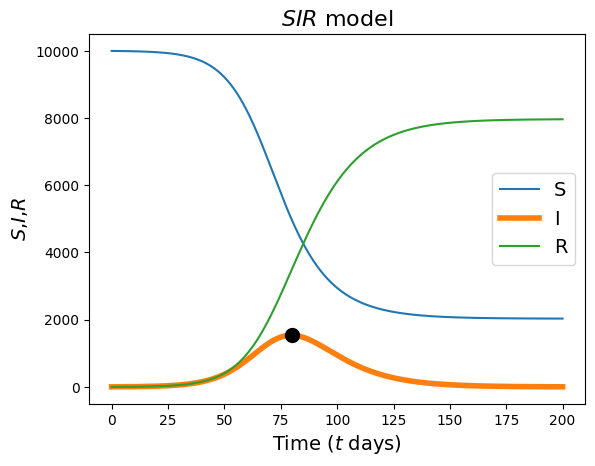

In [56]:
#import libraries 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint #To solve differential equations
from IPython.display import Markdown as md

#Define the differential equations for SIR Model
def SIR(y, t, beta, mu):
    S, I, R = y
    N = S + I + R #Total poluation N is constant over time
    Sdot = -beta * S * I #Rate of change of susceptible population is negative and is proportional to the susceptible population and the infectious population. Beta is the rate of infection.
    Idot = beta * S * I - mu * I #rate of change of infectious population= rate of change of susceptible population - rate of change of recovered population.
    Rdot = mu * I #rate of change of recovered population is proportional to the infectious population. Mu is the rate of removal.
    return Sdot, Idot, Rdot

#Set up time grid for the solution
tf = 200
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)

#Initial conditions and put into array y0
S0 = 10**4 - 3
I0 = 3
R0 = 0
y0 = np.array([S0, I0, R0])
beta0 = 2e-5
mu0 = 0.1

#Solve the SIR Model
y_sol = odeint(SIR, y0, t, args=(beta0, mu0)) #Use args to pass additional arguments beta and mu into the function
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

#Find out the maximum infection point
t_max = t[np.argmax(I)] #Instead of using max() function, using argmax() function to find out the indice of maximum I since we also need to find out the corresponding susceptible population value and time t.
S_max = S[np.argmax(I)]
I_max = I[np.argmax(I)]
max_I_floor = int(np.floor(I_max)) #Use floor function to determine the largest integer less than this value and use int() function to make sure it is the form of integer.

#Plot time series 
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")
plt.xlabel(r"Time ($t$ days)", fontsize = 14)
plt.ylabel(r"$S$,$I$,$R$", fontsize = 14)
plt.plot(t_max, I_max, 'ko', markersize=10) #mark the maximum I point
plt.title(r"$SIR$ model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        

## Analysis
This first graph presents a time-series plot where the x-axis represents time and y-axis represents the number of individuals within the susceptible ($S$), infected ($I$), and recovered ($R$) categories of the population. It demonstrates that the infected population increases exponentially before reaching the peak infected population value and it then decreases after the local maximum point due to the decreased susceptble population and increased recovered population. 

Maximum I (floor): 1535


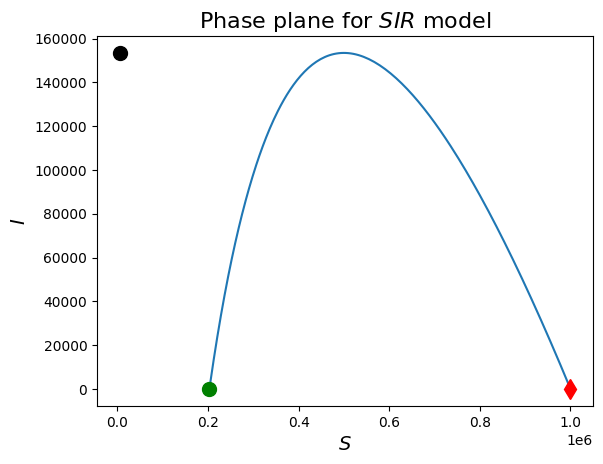

In [113]:
# prints the maximum value of I
print(f"Maximum I (floor): {max_I_floor}")

#Plot Phase Plane
plt.plot(S, I)
plt.xlabel(r"$S$", fontsize = 14)
plt.ylabel(r"$I$", fontsize = 14)
plt.plot(S_max, I_max, 'ko', markersize=10) #mark the maximum I point 
plt.title(r"Phase plane for $SIR$ model", fontsize = 16)

plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.show()

## Analysis

In [118]:
#Outputs the maximum value of I (rounded to the largest integer less than this value)
md(f"The maximum value of $I$ (floor) is ${max_I_floor}$.") 

The maximum value of $I$ (floor) is $1535$.

This second graph is a phase plane for $SIR$ model. Its x-axis is the susceptible population ($S$) while the y-axis is the infected population ($I$). The epidemic process starts at the red point. As time goes by, the susceptible population decreases while the infected population firstly increases until it reaches the maximum infected population (see above) and then decreases afer that.

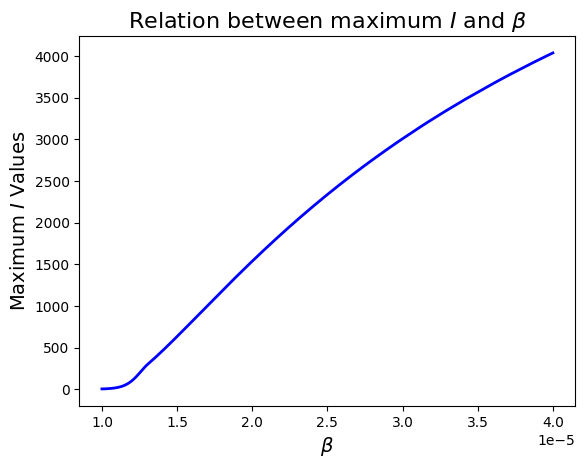

In [58]:

#Beta values vary from 1e-5 to 4e-5
beta_values = np.linspace(1e-5, 4e-5, 500)  
max_I_values_1 = [] #use this list to store the maximum I value for each beta 

#Use for loop to iterate over a range of beta values 
for beta in beta_values:
    y_sol = odeint(SIR, y0, t, args=(beta, mu0))
    I = y_sol[:,1]
    max_I_values_1.append(np.max(I)) #use append() function to add this maximum I value for each beta to the end of the list max_I_values_1

#Plot the maximum value of I as a function of beta 
plt.plot(beta_values, max_I_values_1, 'b-', lw=2)
plt.xlabel(r'$\beta$', fontsize=14)
plt.ylabel(r'Maximum $I$ Values', fontsize=14)
plt.title(r'Relation between maximum $I$ and $\beta$', fontsize=16)
plt.show()

## Analysis
This third graph plots the relationship between different values of $\beta$ and the corresponding maximum infected population. The x-axis is the $\beta$ values while the y-axis is the maximum infected population. In general, as $\beta$, the transmission rate increases, the maximum infected population increases as well. The relationship is nonlinear: the curve shoots off at the beginning and then increases at a decreasing rate. We can conclude from this graph that higher transmission rates cause higher maximum infected population and vice versa so any interventions that could reduce the transmission rates such as social distancing and vaccinations could possibly reduce the peak infection and flatten the epidemic curve. We will analyze these two interventions in A2 and A3.

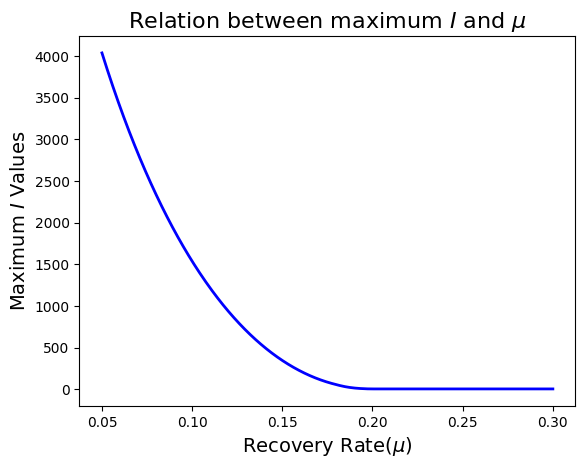

In [61]:
#Mu values vary from 0.05 to 0.5
mu_values = np.linspace(0.05, 0.3, 500)  
max_I_values_2 = [] #use this list to store the maximum I value for each mu

#Use for loop to iterate over a range of mu values 
for mu in mu_values:
    y_sol = odeint(SIR, y0, t, args=(beta0, mu))
    I = y_sol[:,1]
    max_I_values_2.append(np.max(I)) #use append() function to add this maximum I value for each mu to the end of the list max_I_values_2

#Plot the maximum value of I as a function of mu 
plt.plot(mu_values, max_I_values_2, 'b-', lw=2)
plt.xlabel(r'Recovery Rate($\mu$)', fontsize=14)
plt.ylabel(r'Maximum $I$ Values', fontsize=14)
plt.title(r'Relation between maximum $I$ and $\mu$', fontsize=16)
plt.show()

## Analysis
We believe that it would also be useful to also consider the relationship between maximum infected population and $\mu$. Hence, this fourth graph is plotted where the x-axis is the recovery rate ($\mu$) and y-axis is the maximum infected population. Overall, as the recovery rate increases, the maximum infected population decreases but the relationship is nonlinear: at low recovery rate values, a decrease in the recovery rate will greatly reduce the maximum infected population while at high recovery rate values, a decrease in the recovery rate does not have that much impact on the maximum infected population. This conclusion suggests that effective treatment and healthcare access can increase recover rate to reduce maximum infectious population but if the recover rate is already high, it would more effective to implement methods that could reduce transmission rate.

## Task A2. The effect of vaccination (worth approximately 12% of the marks)
**Assignment:** Using Python, solve the deterministic SIR model numerically for different numbers of individuals vaccinated. 

Details:
- Use the following parameter values for the baseline case: $\beta = 2 \times 10^{-5}$, $\mu = 0.1$, $N = 10^{4}$.
- Assume that each simulation starts with 5 infected individuals (with the remainder of the population susceptible, other than those who have been vaccinated).
- Assume that vaccination involves simply withdrawing susceptible individuals from the population (to a new $V$ compartment, which is different to the removed ($R$) compartment) instantaneously at the start of the numerical simulation, and that vaccination is perfectly effective.
- Make a plot of the total number of individuals who are either infected or removed (i.e., $I+R$) after 500 days as a function of the number of vaccinated hosts. Hint: This will require running the SIR model multiple times (once for each value of the number of vaccinated individuals, $V$) using a FOR loop.
- Add markers to the plot corresponding to the (strictly positive) numerical solution of the final size equation (explained in the Lecture and below), in which $N$ is simply reduced by $V$, for values of i) $V = 1000$; ii) $V = 2000$; iii) $V = 3000$.
- Include a derivation of the final size equation in your answer to this task.

- Hint: Recall that the final size equation is $x = N - N \rm{exp} \left( -\frac{\beta x}{\mu} \right)$ in a scenario without vaccination (vaccination then corresponds to reducing the value of $N$). You will have to look up an appropriate Python function to solve this equation numerically. To find the strictly positive solution (rather than the solution $x = 0$) numerically, a sufficiently large "initial guess" may need to be input to the relevant Python function.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

# History of vaccinations 
The origin of vaccination as a way of preventing spread of disease dates back as early as the 15th century where there are records of people attempting to prevent illness by exposing healthy people to a disease called smallpox – a method known as variolation. This method captures the general idea of vaccination quite well as a way to prepare the immune system to better fight off a more harmful disease when necessary.(WHO, 2022) 

However, the major breakthroughs in the history of immunisation comes slightly later on the late 1700s where Benjamin Jesty discovers that infection with cowpox – a virus that mainly affects cattle which can spread to humans – could protect against smallpox. Then in May 1796, English physician Edward Jenner adds to this discovery by inoculating James Phipps with matter collected from a cowpox sore on the hand of a milkmaid. Two months later, Jenner inoculates Phipps with matter from a human smallpox sore to test his resistance and Phipps remained in perfect health. Thus, Phipps became the first person in history to be vaccinated against smallpox and following this, the term “vaccine” is coined after the Latin for cow – vacca. (WHO, 2022)
 
In the centuries to come, many other vaccines were created for various diseases such as rabies in the late 1800s, influenza in 1945 after demand for such a vaccine spiked due to the Spanish Flu pandemic in 1918 and polio in the 1950s. The combined efforts of all of these vaccines have surely saved millions or even billions of lives throughout the last 300 years or so and the most recent example of an impactful vaccine would be the COVID-19 vaccine which was created in December 2020. The impressive thing to note about this vaccination is the speed at which it was produced as it took less than a year to develop after the first case of COVID-19. This corresponds to a rapid improvement in vaccine technology following the usage of mRNA technology. This suggests that the future of vaccines is bright and that new vaccines for various other diseases may be discovered shortly. (WHO, 2022)

# Science of vaccinations 
In order to understand how vaccines act to prevent the spread of disease, we must first cover how a person gets an illness in the first place.  Illness occurs in a person when they are exposed to a pathogen which is a disease-causing organism.  Pathogens are made up of many different subparts and the most important one to us is the subpart called an antigen which triggers the formation of antibodies once a person has been exposed to a pathogen. Antibodies form an integral part of our defence against disease as they attack and destroy specific pathogens depending on the antigen in that pathogen.  When the human body is first exposed to a pathogen, it takes time for the antigen-specific antibodies to be produced and in the meantime, the person falls ill. (WHO, 2020)

Crucially, once the body has produces antibodies in its response to a pathogen, it also creates antibody-producing memory cells which stay alive even after all of the pathogens have been destroyed. Therefore, if the body is exposed to the same pathogen in the future, it can produce the specific antibodies require much faster, protecting against disease. (WHO, 2020)
 
Vaccines contain weakened or inactive antigens that trigger an immune response in the body when given to someone and so trigger the formation of antigen-specific antibodies. Some newer vaccines contain the blueprint for creating these antibodies instead of the antigen itself but either way, antibodies are produced after taking the vaccine. This weakened version will not cause the disease in the person receiving the vaccine, but it will cause the immune system to respond as if the body had been exposed to the disease. Specifically, antigen-specific antibody-producing memory cells are produced so if in the future the person is exposed to the pathogen that the vaccine is protecting against, their immune system will act much quicker. The result is that the pathogens are destroyed much faster and that protects the person with the vaccine from disease but also acts to prevent that person spreading the pathogens to others. (WHO, 2020)


# Our model  
The way that we investigate the effect of vaccination on the spread of a disease is by determining its impact on the outcome of a deterministic $SIR$ model on a relatively small population of $10000$ people. The way in which we go about this is by assuming that there is a fixed number of people in the population that are vaccinated against the disease at the start of the outbreak and investigating the size of $I + R$ after $500$ days different numbers of people vaccinated This idea of observing the value of $I + R$ after $500$ days correlates significantly with the numerical solution of a revised final size equation which takes vaccination into account.  

We start by looking at the differential equations that determine the values of $I$ and $S$ 
$$\frac{dS}{dt\ }=\ -\beta IS\ ,\ \frac{dI}{dt\ }=\beta IS\ -\ uI\ $$ 
We combine these to get 
$$\frac{dI}{dS\ }=-1\ +\ \frac{u}{\beta S}\ $$ 
Solving this to get an equation for $I$, we get 
$$I\ =\ -S\ +\ \frac{u}{\beta}\ln\left(S\right)\ +\ C$$ 
Subbing in initial conditions to get $C$, 
$$C=I\left(0\right)\ +\ S\left(0\right)\ -\frac{u}{\beta}\ln\left(S\left(0\right)\right)\ $$ 
So 
$$ I\ =-S\ +\ \frac{u}{\beta\ }\ln\left(S\right)\ +\ I\left(0\right)\ +\ S\left(0\right)\ -\frac{u}{\beta}\ln\left(S\left(0\right)\right)\ $$  
At outbreak start, $I(0) + S(0) = N - v$ where $v$ is the number of people vaccinated  
$$I\ =\ -S\ +\ \frac{u}{\beta}\ln\left(S\right)\ +\ \left(N-v\right)\ -\frac{u}{\beta}\ln\left(S\left(0\right)\right)$$ 
At outbreak end, no more infected left so $I(\infty) = 0$ and $S(\infty) + R(\infty) = N - v$ , to taking the limit at $t$ tends to infinity 
$$0\ =-\left(\left(N-v\right)-R\left(\infty\right)\right)\ +\ \frac{u}{\beta}\ln\left(\left(N-v\right)-R\left(\infty\right)\right)\ +\ \left(N-v\right)\ +\ \frac{u}{\beta}\ln\left(S\left(0\right)\right)$$  
Rearranging this gives, 
$$ R\left(\infty\right)=\left(N-v\right)\ -S\left(0\right)\exp\left(-\frac{\beta R\left(\infty\right)}{u}\right)\ $$  
We will approximate $S(0) = N - v$, so we end up with 
$$R\left(\infty\right)\ =\left(N-v\right)\ -\ \left(N-v\right)\exp\left(-\frac{\beta R\left(\infty\right)}{u}\right)\ $$ 

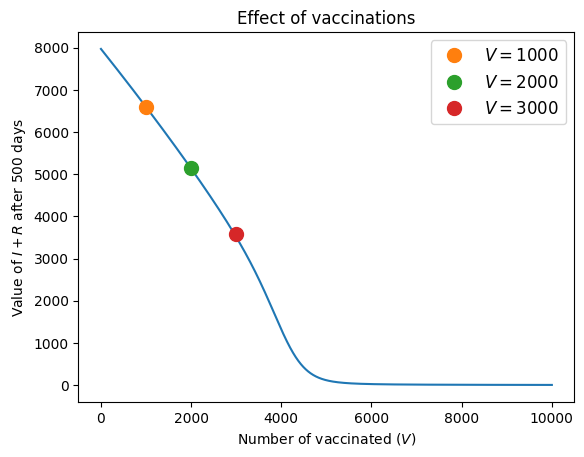

In [45]:
# importing necessary functions from various libraries
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 
from sympy import cos,nsolve,Symbol,exp 

# setting up parameter values 
beta = 2*(10**-5) 
mu = 0.1 

# Creating a function to be used in numerically solving the system of DE's in the SIR model 
def SIR(y,t): 
    S,I,R = y 
    N = S + I + R 
    Sdot = -beta * S * I 
    Idot = beta * S * I - mu * I 
    Rdot = mu * I 
    return(Sdot,Idot,Rdot)  

# Setting a population value 
N = 10**4

# Creating a function which returns the value of I+R after 500 days for various values of vaccinated people 
def sol(v): 
    tf=500
    Nsteps = 1000 
    t = np.linspace(0,tf,Nsteps+1) 
    
    S0 = 10**4 - 5 - v
    I0 = 5 
    R0 = 0
    y0 = np.array([S0,I0,R0]) 
    
    ysol = odeint(SIR,y0,t) 
    S = ysol[:,0] 
    I = ysol[:,1] 
    R = ysol[:,2]  
    
    iplusr = I[500] + R[500] 
    return iplusr 


# Creating a vector to store outputs of above function for v in the range 0 to the whole population
vsol = [] 
for i in range(0,N+1): 
    vsol.append(sol(i))
v=np.linspace(0,N+1,N+1)              # vector to plot the vsol against the value of v

## Numerically finding a solution to the final size equation adjusted to account for vaccinations 
x=Symbol("x") 
F1 = nsolve(x-(N-1000) + (N-1000)*exp(-beta*x/mu),x,10000) 
F2 = nsolve(x-(N-2000) + (N-2000)*exp(-beta*x/mu),x,10000) 
F3 = nsolve(x-(N-3000) + (N-3000)*exp(-beta*x/mu),x,10000) 

## plotting the value of I+R after 500 days against the number of people vaccinated including markers at V=1000,2000 and 3000 respectively
plt.plot(v,vsol) 
plt.xlabel("Number of vaccinated ($V$)") 
plt.ylabel(r"Value of $I+R$ after 500 days") 
plt.title("Effect of vaccinations") 

plt.plot(1000,F1,"o",markersize="10", label=r"$V = 1000$")
plt.plot(2000,F2,"o",markersize="10", label=r"$V = 2000$")
plt.plot(3000,F3,"o",markersize="10", label=r"$V = 3000$")
plt.legend(fontsize=12)
plt.show()

## Analysis
Our investigation yields a nice result as seen above which clearly indicates that as the number of people who are initially vaccinated increases, the size of $I + R$ after $500$ days decreases very rapidly to $0$. Since the value of $I + R$ after $500$ days gives a good indication of the overall size and impact of an outbreak, it can be concluded that increasing the number of people who are vaccinated at outbreak start will drastically reduce the impact of aforementioned outbreak. 
However in reality a model of this sort may be slightly cumbersome. In practice, many vaccines are produced whilst the outbreak is ongoing such as in the case of COVID-19 and more people are vaccinated as time goes on. So, an improvement to our model could be made by allowing the number of vaccinated people to be a function of time much like the other variables in the $SIR$ model. However, an approach such as ours could be more viable if you were to investigate a disease such as the flu, where many people have already built up an immunity of sorts it. In this case, there is closer to a fixed number of vaccinated people at outbreak start so an analysis based on our model may be more accurate.  

## Task A3. The effect of social distancing (worth approximately 12% of the marks)

The introduction and/or removal of social distancing can be modelled by varying the infection rate parameter, $\beta$. In this exercise, we will use the following time-dependent infection rate parameter:

$$
\beta(t)  = 2 \times 10^{-7} \text{  whenever  } t < T, \\
\beta(t)  = 1.5 \times 10^{-7} \text{  whenever  } T \le t \le T + 30, \\
\beta(t)  = 2 \times 10^{-7} \text{  whenever  } t > T + 30. \\
$$

**Assignment:** Using Python, run the deterministic SIR model for the social distancing strategy described above.

Details:
- For this task, use the values $\mu = 0.1$, $N = 10^{6}$, and assume that the initial values of $(S,I,R)$ are $(N-5,5,0)$.
- Run the SIR model, adapted according to the time-dependent value of $\beta$ described above, for a value of $T = 30$ days. Plot a time-series showing $S(t)$, $I(t)$ and $R(t)$.
- Consider a scenario in which $T$ is not necessarily 30 days, and can instead take a fixed integer value between 1 and 200 days. Write a FOR loop to identify the value of $T$ that minimises the maximum value of $I$ in the model simulation. Plot the maximum value of $I$ as a function of $T$, and print the value of $T$ that "flattens the curve" most.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

# Our Model
This graph models the effect of introducing a social distancing protocol at a certain point, in this case at a time of 30 days after the outbreak has began. This is model is performed by introducing a function $\beta(t)$ instead of the general method of using a fixed $\beta$. During the social distancing protocol, people would be required to limit contact with others for a period of 30 days, after which they would be able to return to normal.

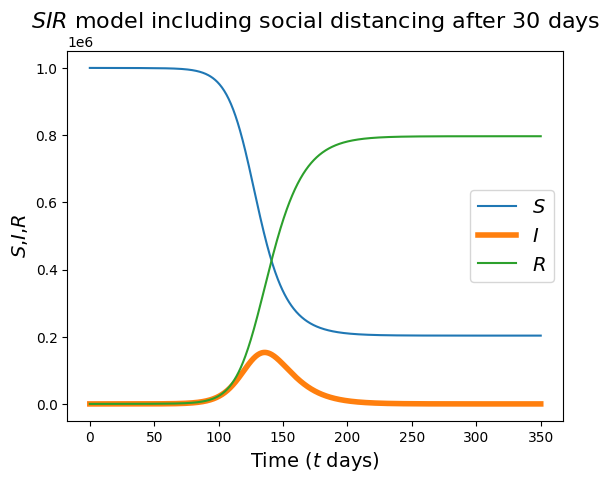

In [108]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import Markdown as md

# define a function to give the RHS of the ODE system with social distancing implemented
def SIR_social_distance(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = betaFunc(t)
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

# define a function for beta 
def betaFunc(t):
    if t<T or t>T+30:
        return 2*10**-7
    if T<=t and t<=T+30:
        return 1.5*10**-7

# --- Problem setup --- #

# set up time grid for the solution
tf = 350
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)

# give the T value for the beta function
T=30

# Set initial conditions and put into array y0
S0 = 10**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

# --- Call the ODE solver and extract solutions --- #
  
y_sol_social_distance = odeint(SIR_social_distance, y0, t)

# extract S, I, R from the solution array y_sol_social_distance
S_social_distance = y_sol_social_distance[:,0]
I_social_distance = y_sol_social_distance[:,1]
R_social_distance = y_sol_social_distance[:,2]

# plot the time evolution of the S, I, R
plt.plot(t, S_social_distance, label = r"$S$")
plt.plot(t, I_social_distance, lw = 4, label = r"$I$")
plt.plot(t, R_social_distance, label = r"$R$")

# labels etc
plt.xlabel(r"Time ($t$ days)", fontsize = 14)
plt.ylabel(r"$S$,$I$,$R$", fontsize = 14)
plt.title(r"$SIR$ model including social distancing after 30 days", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()     

# ---- Solve the same ODE but without social distancing implemented ---- #

# define a function to give the RHS of the ODE system without social distancing
def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 2*10**(-7)
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

y_sol = odeint(SIR, y0, t)

S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

# find the maximum values of I (rounded down)
max_I_social_distance = int(np.floor(max(I_social_distance)))
max_I = int(np.floor(max(I)))

# Analysis of our Results

From this graph we can tell that introducing social distancing doesn't impact the way in which disease is spread as the graph remains the same shape as the graph for an $SIR$ model without social distancing.

In [116]:
md(f"The maximum value for the number of infected individuals ($I$) (floor) when social distancing after 30 days is implemented is ${max_I_social_distance}$. The maximum value for the number of infected individuals ($I$) (floor) without social distancing is ${max_I}$.")

The maximum value for the number of infected individuals ($I$) (floor) when social distancing after 30 days is implemented is $153253$. The maximum value for the number of infected individuals ($I$) (floor) without social distancing is $153428$.

From these results we can clearly see that social distancing does impact the total number of people infected. However, the difference between the two values is minimal, leading us to believe that social distancing at 30 days isn't the most effective method. Therefore, in the next section we will analyse the optimum point of introducing it.

# Our Model
To find the optimum point to introduce social distancing, we loop through values of $T$ between 1 and 200 and obtain the maximum number of infected individuals ($I$). From doing this we can graph how different values of $T$ impact the maximum value of $I$ and then find the value of $T$ that minimises the maximum value of $I$.

The value of T that 'flattens the curve' the most is: 99


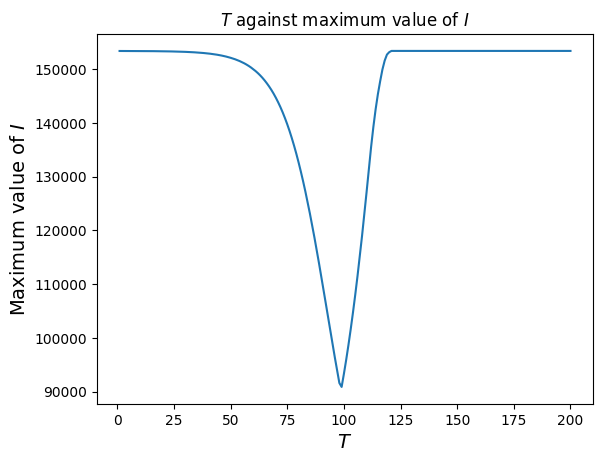

In [110]:
# create lists to be added to
T_list = []
I_list =[]

# loop through values of T to find the maximum value of I at each T
for T in range(1,201):
    T_list.append(T)
    y_sol = odeint(SIR_social_distance, y0, t)
    I = y_sol[:,1]
    I_max=max(I)
    I_list.append(I_max)
    
# find the index of the 'flattest' I
I_min = np.where(I_list==min(I_list))

# prints the value of T that 'flattens the curve' the most
print(f"The value of T that 'flattens the curve' the most is: {T_list[I_min[0][0]]}")

# plots a graph of T against the maximum I values
plt.plot(T_list,I_list)
plt.title(r"$T$ against maximum value of $I$")
plt.xlabel(r"$T$", fontsize=14)
plt.ylabel(r"Maximum value of $I$", fontsize=14)
plt.show()


# Analysis of our Results

In [111]:
md(f"The value of $T$ that 'flattens the curve' the most is: ${T_list[I_min[0][0]]}$. At this $T$ value the maximum value of $I$ (floor) is ${int(np.floor(min(I_list)))}$ which compared with the maximum value of $I$ without social distancing (${max_I}$) is a massive improvement.")

The value of $T$ that 'flattens the curve' the most is: $99$. At this $T$ value the maximum value of $I$ (floor) is $90856$ which compared with the maximum value of $I$ without social distancing ($153428$) is a massive improvement.

By comparing this graph with the previous graph, we can tell the reason that this $T$ value works the best is because it introduces social distancing at the time where $I$ begins to rapidly increase. Furthermore, we can tell that it is pointless to introduce social distancing too early on as it has minimal impact and that the same is true for if we introduce it once $I$ has began to decrease.

It is clear that social distancing by this means would help to reduce the number of individuals infected. However, there are other methods that would likely be more successful in reducing the number of infected individuals. For example, if in addition to a mandate for everyone to social distance, there was also a mandate that specified that whenever someone became infected they must socially distance themselves from others for 30 days, it would likely reduce the numbers of infected even more.

## The Stochastic SIR model


This part of the assignment builds on the "Epidemiology II code" notebook, which provides code for running one simulation of the stochastic SIR model in Python. We are interested in running simulations to compare the dynamics of the deterministic SIR model and stochastic SIR model, and to estimate the probability of a major outbreak when a single infected individual enters an entirely susceptible population using the stochastic SIR model.

---

## Task A4. Comparison between the stochastic and deterministic SIR models (worth approximately 12% of the marks)

**Assignment:** The end goal of this task is to run 100 simulations of the stochastic SIR model, generate a plot showing the mean value of $I(t)$ (averaged across all of the simulations) versus $t$, and then compare this output to the analogous output from the deterministic SIR model.

Details: 
- We will use the following parameter values for the baseline case (where, throughout this assignment, time is measured in days): $\beta = 3 \times 10^{-4}$, $\mu = 0.1$, $N = 10^{3}$.
- In each simulation, there will be 10 individuals infected initially (with the rest of the population susceptible).
- The most challenging part of this task is that, in each simulation, events will occur at different times. As a result, we have to write code that, for each simulation, extracts the value of $I(t)$ at a set of pre-defined values of $t$. One way to do this is to set up a vector at the beginning of the simulation containing 201 blank entries (corresponding to $t = 0, 0.5, 1, 1.5, ..., 100$), and then populate the relevant entries after each event (i.e. put the value of $I$ before the current event in all entries corresponding to times between the last event time and the current one). This vector can then be averaged across all simulations.
- The code in the Python notebook entitled "Epidemiology_Part_A4_with_Errors" is a first attempt at writing such code (i.e. code that outputs a vector $I_{vals}$ with entries recording the values of $I$ at $t = 0, 0.5, 1, 1.5, ..., 100$) for a single simulation of the stochastic SIR model, but it contains three mistakes. Correct this code (and then copy the resulting code into your answer to this task in this notebook).
- Now that you have corrected the code described above, run 100 simulations of the stochastic SIR model and plot the average values of the vector $I_{vals}$, plotted at $t = 0, 0.5, 1, 1.5, ..., 100$.
- Finally, on the same axes, plot the analogous numerical solution of the determinstic SIR model. The team member who completed Task A1 (above) should be able to help you with this.

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

# History of the stochastic model for epidemiology
An early stochastic model for epidemics was proposed by A.G. McKendrick in 1926 which is before he worked with Kermack in 1928 on deterministic models in epidemiology. This is somewhat surprising given that the deterministic model is in theory much simpler as it assumes that the same amount of time passes before each event whereas the stochastic model allows for variation in this length.  Advancements on McKendrick’s model were made in 1928 by Green and Frost and in 1931 by Greenwood who both proposed discrete time stochastic models. After this, Bartlett studied a continuous time stochastic $SIR$ model much like the one we use in our investigation.  The exact stochastic $SIR$ model we use is based on the Gillespie Direct Method created by Dan Gillespie in 1977 to model chemical and biochemical reaction systems efficiently with limited computational power. This method is also referred to as the Stochastic Simulation Algorithm (SSA) (Greenwood, P. and Gordillo, L., 2009).


# Our use of the stochastic model 
In our stochastic model, we assume that events occur at exponentially distributed time intervals so the time until the next event follows an exponential distribution with rate parameter $$\beta SI\ +\ \mu I$$ . The probability that the next event is an infection is $$\frac{\beta IS}{\beta IS\ +\ \mu I}$$ and similarly the probability of removal is $$\frac{\mu I}{\beta SI\ +\ \mu I}$$
The method involves generating two random variables $r_1$, $r_2$ from a uniform distribution between 0 and 1, then we calculate the time of the next event from an exponential distribution 
$$ t\ =\ t\ +\ \frac{1}{\beta IS\ +\ \mu I}\ln\left(\frac{1}{r_1}\right)$$  
Then we choose whether the next event is an infection or a removal. If 
$$r_{2}<\frac{\beta IS}{\beta IS\ +\ \mu I}$$ 
then the next event is an infection so set $S = S - 1$ and $I = I + 1$, otherwise set $I = I - 1$ and $R = R + 1$. This process is repeated while the outbreak is ongoing (i.e while $I > 0$). 

This model more accurately reflects the randomness involved in social interactions, which is key to monitoring the spread of any disease as most tend to be transmitted through touch, air or water, than the deterministic model. Therefore, in many cases, predictions based on a stochastic model of this type will be more accurate than predictions drawn from a deterministic model. 


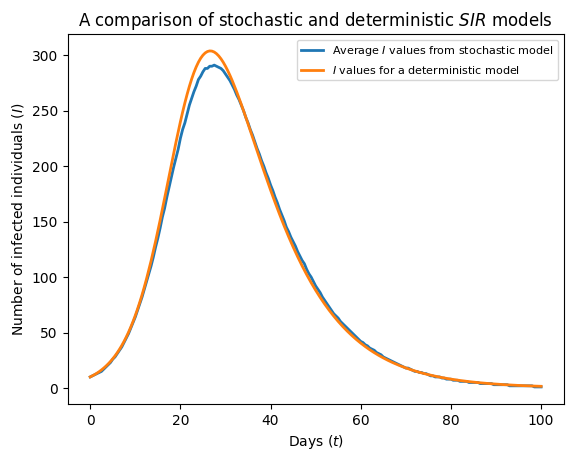

In [133]:
## import necessary functions from their respective libraries
import numpy as np 
import matplotlib.pyplot as plt 
import statistics as stat 
from scipy.integrate import odeint 

tVals = np.array([i*0.5 for i in range(201)])

def sSIR(): 
    # Parameter values
    beta = 3.0*10**-4
    mu = 0.1
    
    
    # Set up an array to record pre-determined times and values of I at those times
    tVals = np.array([i*0.5 for i in range(201)])
    IVals = np.array([0 for i in range(201)])
    
    # Set initial conditions and the initial time
    S = 10**3 - 10
    I = 10
    R = 0
    t = 0
    
    IVals[0] = I
    
    
    # --- While the outbreak is ongoing (I > 0), generate events --- #
      
    while I > 0:
        
        previous_time = t
        
        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t + (1/totalRate)*np.log(1/r1)
        
        new_time = t
        
        for i in range(201):
            if previous_time < tVals[i] < new_time:
                IVals[i] = I
        
        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
    return(IVals) 
    
## generates a matrix containing 100 iterations of the stochastic SIR model
IVals_matrix = np.zeros([100,201]) 
for i in range(100): 
    IVals_matrix[i,:] = sSIR() 
    
## finds the average value of I across these 100 simulations at each t=0,0.5,1,...
av_Ivals = np.array([0 for i in range(201)]) 
for i in range(201): 
    av_Ivals[i] = stat.mean(IVals_matrix[:,i]) 

## Creates an analagous solution to the detrministic SIR model
def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 3*(10**-4)
    mu = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I
    Idot = beta * S * I - mu * I
    Rdot = mu * I
    
    return Sdot, Idot, Rdot

S0 = 10**3 - 10
I0 = 10
R0 = 0
y0 = np.array([S0, I0, R0]) 
y_sol = odeint(SIR, y0, tVals) 
I = y_sol[:,1] 

## plots the evolution of I averaged over 100 stochastic simulations and a deterministic prediction
plt.plot(tVals,av_Ivals, lw = 2 , label = r"Average $I$ values from stochastic model") 
plt.plot(tVals, I, lw = 2, label = "$I$ values for a deterministic model")  
plt.title(r"A comparison of stochastic and deterministic $SIR$ models")
plt.xlabel(r"Days ($t$)")
plt.ylabel(r"Number of infected individuals ($I$)")
plt.legend(fontsize = 8)
plt.show()

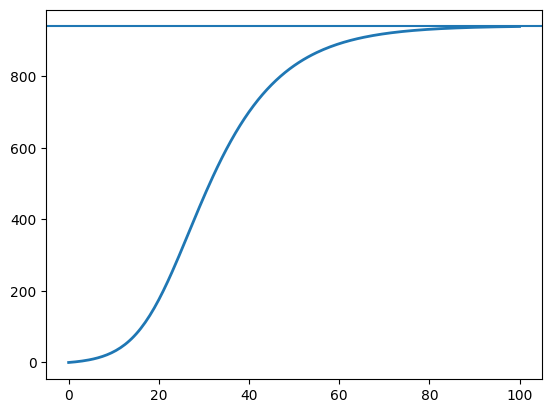

In [136]:
R=y_sol[:,2]
plt.plot(tVals, R, lw = 2, label = "$I$ values for a deterministic model")  
plt.axhline(940)
plt.show()

## Analysis
An interesting observation that we made in our investigation is that when you run one simulation of the stochastic $SIR$ model and plot the evolution of $I$ over time, there are many spikes, and it tends to deviate from the curve for $I(t)$ given by solving an analogous deterministic model. However, if you run 100 simulations of the stochastic model and plot the evolution of the average $I$ values over time, it generates a curve which is very similar to that given by the deterministic model which is shown in the above graph. 

The curves for the averaged $I$ values from 100 stochastic simulations and for the $I$ values generated by a deterministic model are almost completely identical and differ only in the fact that the deterministic model predicts a slightly higher peak of the number of infected individuals. Also it is interesting to note that both models predict that the peak number of infected individuals will occur around 30 days into the outbreak. So it would appear that similar predictions arise from the two models despite their obvious differences. 

## Task A5. The probability of a major outbreak (worth approximately 12% of the marks)

**Assignment:** Run 1000 simulations of the stochastic SIR model, starting from a single infected individual (with the remainder of the population susceptible). Count the number of simulations in which the final value of $I+R$ exceeds 10 (i.e. the number for which $R>10$ when $I$ hits zero), and compare this to the analytic estimate for the "probability of a major outbreak" described in the Lecture.

Details: 
- Use the following parameter values for the baseline case (where time is again measured in days): $\beta = 3 \times 10^{-4}$, $\mu = 0.1$, $N = 10^{3}$.
- Recall from the lecture that the analytic estimate for the probability of a major outbreak is $p = 1 - \frac{1}{R_0}$, where $R_0 = \frac{\beta N}{\mu}$.
- Run 1000 simulations of the stochastic SIR model. Calculate (and print) the proportion of simulations in which the final value of $I+R$ exceeds 10.
- Calculate and print the analogous analytic estimate for the probability of a major outbreak.

- Hint: To run 1000 simulations of the stochastic SIR model, you will need to use a FOR loop. To run the simulations more quickly, you do not have to store the values of $t$, $S$, $I$ and $R$ after every event (instead, simply store the value of $I + R$ at the end of the simulation).

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

## Our Model
We ran the stochastic $SIR$ model 1000 times and incremented a counter by 1 every time $I + R > 10$. We then used that counter to calculate the proportion of times this occured. As we ran the stochastic model until $I = 0$,  instead of recording if $I + R > 10$ we could just record if the final value of $R$ was greater than 10.

In [119]:
# import libraries
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

# --- Problem setup --- #

# Parameter values
beta = 3.0*10**-4
mu = 0.1
N = 10**3

# set a counter for the number of times I + R > 10
I_RCount = 0

# run the simulation 1000 times
for i in range(0,1000):
    # Set initial conditions and the initial time
    S = N - 1
    I = 1
    R = 0
    t = 0
    
    # --- While the outbreak is ongoing (I > 0), generate events --- #
    while I > 0:
        
        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)
        
        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1
            
    if R>10:
        I_RCount += 1

# calculate the analytic estimate for the probability of a major outbreak
R_0 = (beta*N)/mu
p = 1 - (1/R_0)

# prints the proportion of times I + R > 10
print(f"The proportion of times I + R > 10 was: {I_RCount/1000}")
# prints the analytic estimate for the probability of a major outbreak
print(f"The analytic estimate for the probability of a major outbreak is: {p}")

The proportion of times I + R > 10 was: 0.661
The analytic estimate for the probability of a major outbreak is: 0.6666666666666667


## Analysis

In [121]:
md(f"As the proportion of times $I + R > 10$ was ${I_RCount/1000}$ and the analytic estimate for the probability of a major outbreak is ${p}$ we can tell that:")

As the proportion of times $I + R > 10$ was $0.661$ and the analytic estimate for the probability of a major outbreak is $0.6666666666666667$ we can tell that:

- It is reasonable to assume that if we were to increase the number of simulations we ran then the proportion of times $I + R > 10$ would approach the value of the analytic estimate for the probability of a major outbreak.
- If the total number of infected individuals goes above 10 then it is likely that a major outbreak will occur.

## Section B (worth approximately 40% of the marks)

## Task B1. Extensions
**Assignment:** Using Python, write code to complete the following exercises:

- Consider the variable $M$, which represents the total number of individuals ever infected over the entire course of a simulation of the stochastic SIR model (run until $I$ hits zero) - i.e. the final value of $I + R$. Plot a graph of ${\rm Prob}(M > m)$ as a function of $m$, for the default parameter values described in Task A5 above (compute the probability by running a large number of stochastic simulations and calculating the proportion of simulations in which $M>m$). Hint: You only have to run the simulations once (rather than running multiple simulations for each value of $m$).
- Add a vertical line to the plot marking the value of $m$ that corresponds to the (positive) solution to the "final size equation" described in the Lecture (note: you will have to look up an appropriate Python function to solve this equation numerically, as in Task A2 above).
- Now instead consider the stochastic SIS model described in the paper "Will an outbreak exceed available resources for control? Estimating the risk from invading pathogens using practical definitions of a severe epidemic" by Thompson, Gilligan and Cunniffe (https://royalsocietypublishing.org/doi/epdf/10.1098/rsif.2020.0690). The key difference between the stochastic SIR model and the stochastic SIS model is that, in the stochastic SIS model, individuals go back into the $S$ compartment when they recover (rather than entering the $R$ compartment). Pick either the "Final size" or "Duration" definition of a severe epidemic described in that paper, and write code to reproduce the relevant figure from that article using model simulations (either Fig 4a or Fig 4b; n.b. you are only required to reproduce the solid lines in the chosen figure). Hint: You do not have to simulate the model until $I$ hits zero to make this figure - that might take a very long time. Instead, you can stop each simulation as soon as the relevant maximum value on the x-axis is exceeded (or when $I$ hits zero, if that occurs first).
- Most of this Assignment involved using deterministic and stochastic versions of the basic SIR model. However, the SIR model is quite simple and does not include some important features that affect transmission of pathogens in the real world. Do some research into ways that the SIR model can be extended to include additional real-world realism. Write one or two paragraphs to summarise your findings (including noting some pathogens/diseases for which the extensions that you explain are appropriate).

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*


---

## Our Model
To calculate $Prob(M > m)$ we ran a stochastic $SIR$ model 1000 times and then for each $m$ between 0 and 1000 (inclusive) we recorded the proportion of times $I + R > m$. We then used this data to plot a graph.

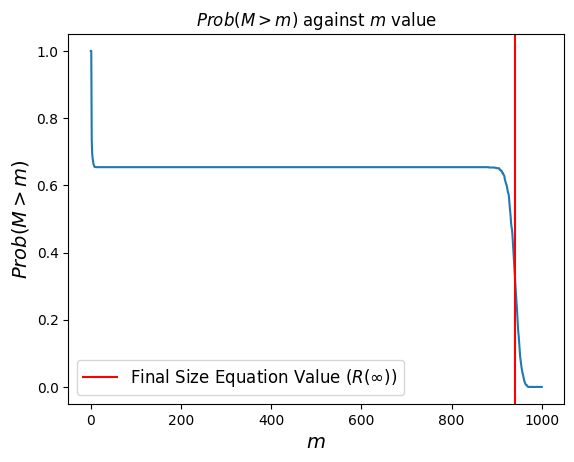

In [122]:
# import libraries

import numpy as np # Import NumPy library. The "np" bit tells Python to give NumPy the alias of np. So now we can call "np" rather than "numpy".
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# --- Problem setup --- #

# Parameter values
beta = 3.0*10**-4
mu = 0.1
N = 10**3

#
m = [0 for i in range(0,1001)]

sum0 = 0

# run the simulation 1000 times
for i in range(0,1000):
    # Set initial conditions and the initial time
    S = N - 1
    I = 1
    R = 0
    t = 0
    
    # --- While the outbreak is ongoing (I > 0), generate events --- #
      
    while I > 0:
        
        r1 = np.random.uniform(0, 1, 1)
        totalRate = beta*I*S + mu*I
        t = t - (1/totalRate)*np.log(r1)
        
        r2 = np.random.uniform(0, 1, 1)
        if r2 < beta*I*S/totalRate:
            S = S - 1
            I = I + 1
        else:
            I = I - 1
            R = R + 1

    #updates the probability for each m value
    for i in range(0,R+1):
        m[i] += 10**-3

# creates the final size function
x0=np.array([N, beta, mu])
def final_size(x,x0):
    N, beta, mu = x0
    return N - N*np.e**((-beta*x)/mu) - x
    
# solves the final size function
finalSizeValue = fsolve(final_size,N, x0)

# plot graph of the probability
plt.plot(range(0,1001),m)
plt.title(r"$Prob(M > m)$ against $m$ value")
plt.xlabel("$m$", fontsize=14)
plt.ylabel("$Prob(M > m)$", fontsize=14) 
plt.axvline(finalSizeValue, color="r", label="Final Size Equation Value ($R(\infty)$)")
plt.legend(fontsize=12)
plt.show()

## Analysis
One feature of this graph is the plateau in the middle section where $Prob(M > m)$ remains at approximately $2/3$ which interestingly is the value obtained for the analytic estimate for the probability of a major outbreak calculated in Task A5. The reason this is the probability here, is because there is likely to be a large number of infected individuals at any one time, so there is a high likelihood of a major outbreak occuring.

The placement of the value obtained from the Final Size Equation makes sense as it appears to occur in the middle between where the graph begins to decrease again after the plateau and where $m = 1000$, suggesting that a similar value could be obtained by calculating the average between these points.

In [147]:
initial = m[500]
for i in range(500,1001):
    if m[i] < initial:
        start = i
        break

md(f"In fact, $R(\infty) = {finalSizeValue[0]}$ and the average between where the graph begins to decrease again and $m = 1000$ is ${(start+1000)/2}$")

In fact, $R(\infty) = 940.4797907073929$ and the average between where the graph begins to decrease again and $m = 1000$ is $941.5$

## Our Model
For this task we used the $SIS$ model, which is where there are a susceptible ($S$) population and an infected ($I$) population, and once they have recovered from the infection they are returned to the suceptible population. We also used the "duration" metric for a severe epidemic, so the graph produced below is a reproduction of 4b in the paper: "Will an outbreak exceed available resources for control? Estimating the risk from invading pathogens using practical definitions of a severe epidemic".

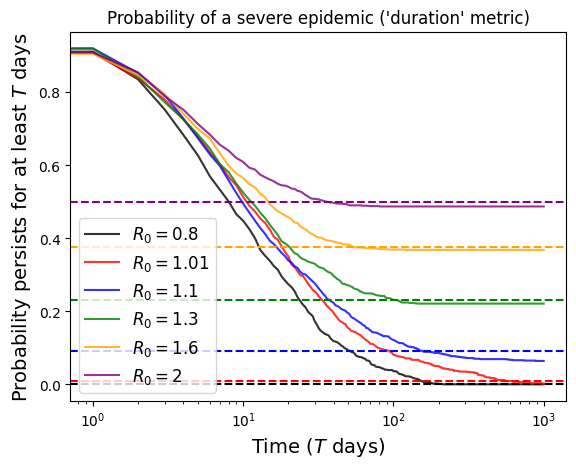

In [54]:
# creates lists of the R_0 values and their corresponding colours
R_0List = [0.8, 1.01, 1.1, 1.3, 1.6, 2]
colours = ["black", "red", "blue", "green", "orange", "purple"]

# Parameter values
mu = 0.1
N = 10**3
finalTime = 1000

def SIS_sim(beta, finalTime):
    # creates list for the probabilities to be stored in
    probMajorEpidemic = [0 for i in range(0,finalTime+1)]
    # run the simulation 1000 times
    for i in range(0,1000):
        # Set initial conditions and the initial time
        S = N - 1
        I = 1
        t = 0
        
        # --- While the outbreak is ongoing (I > 0), generate events --- #
        while I > 0 and t <finalTime:
            r1 = np.random.uniform(0, 1, 1)
            totalRate = beta*I*S + mu*I
            t = t - (1/totalRate)*np.log(r1)
            r2 = np.random.uniform(0, 1, 1)
            
            if r2 < beta*I*S/totalRate:
                S = S - 1
                I = I + 1
            else:
                I = I - 1
                S = S + 1
                
        j = 1
        while j  <= int(t[0]):
            #updates the probability corresponding to each day
            if j <= finalTime:
                probMajorEpidemic[j] += 1/1000
            j += 1
            
    return probMajorEpidemic

# calculate the probability of a major epidemic by equation 1.1
def estimateProbMajorEpidemic(R_0, I_0):
    if R_0 > 1:
        estimate = 1 - (1/R_0)**I_0
    else:
        estimate = 0
    return estimate

# plots a graph of the probabilities
for i in range(len(R_0List)):
    # plots the probability of a major epidemic based on the relevant R_0 value
    probMajorEpidemic=SIS_sim(R_0List[i]*mu/N, finalTime)
    plt.plot(range(0, finalTime+1), probMajorEpidemic, label=f"$R_0 = {str(R_0List[i])}$", color=colours[i], alpha=0.8)
    
    # plots the probability of a major epidemic by equation 1.1
    estimateMajorEpidemic = estimateProbMajorEpidemic(R_0List[i], 1)
    plt.axhline(estimateMajorEpidemic, color=colours[i], linestyle="--")

# labels etc
plt.title("Probability of a severe epidemic ('duration' metric)")
plt.xlabel(r"Time ($T$ days)", fontsize=14)
plt.ylabel(r"Probability persists for at least $T$ days", fontsize=14)
plt.xscale("log")
plt.legend(fontsize = 12)
plt.show()

## Research
The $SIR$ model using deterministic and stochastic approaches is a good way of presenting the data however these methods of modelling are often limited due to its simplistic design and doesn’t take into account how pathogens are transmitted in the real world. For example, the $SIR$ model assumes that all individuals in the removed category are removed from the study (by death or recovery) however we know this does not apply to every pathogen. The Coronavirus is an example of an exception as those who have recovered are not guaranteed immunity (many people have caught the coronavirus multiple times). Therefore, the $SIR$ model is potentially underestimating the number of susceptible individuals.

Another alteration of the model is to extend the $SIR$ model to the $SEIR$ model. The additional $E$ represents exposed but non-infectious individuals. This would therefore be able to better classify each subsection without overcomplicating the model. An example of this is Ebola, cholera and malaria all of which used this adapted model to better simulate the infection of the pathogen.

Also, the model is exponential however in reality this does not accurately depict how pathogens are spread. Due to different networks between people such as families and coworkers, the pathogen is unlikely to follow an exact exponential pattern. Another thing the model doesn’t take into account is individuals more susceptible to infection. This may include those with diabetes, cancer or individuals who have recently undergone a transplant. The model does not take this into account and therefore would be a sensible adaptation to the model.

### A recent use of the stochastic model 
A very recent example of the use of a stochastic $SIR$ model is the use of a slightly more involved model to predict the evolution of COVID-19 pandemics in municipalities (countries with small populations). The model is a reinterpretation of a classical $SIR$ model which interprets infectious diseases as chemical processes governed by the Chemical Master Equations (CME) and uses the Stochastic Simulation Algorithm (SSA). The model is then modified further by including a variable infection rate in order to capture a turning point in the pandemic’s evolution and also uses an $SIR$ model with jumps to allow for the possibility for various people to get infected at the same time for one infected individual. The model was effective at predicting the evolution of COVID-19 in several municipalities in the Northwest of the Iberian Peninsula. (Pájaro, M., Fajar, N.M., Alonso, A.A. and Otero-Muras, I. , 2022)

# References:
- World Health Organization (2022). A Brief History of Vaccination. [online] World Health Organization. Available at: https://www.who.int/news-room/spotlight/history-of-vaccination/a-brief-history-of-vaccination.
- World Health Organization (2020). How do vaccines work? [online] World Health Organisation. Available at: https://www.who.int/news-room/feature-stories/detail/how-do-vaccines-work
- •	Greenwood, P. and Gordillo, L. (2009). Stochastic Epidemic Modelling. [online] Available at: https://aimath.org/WWN/populationmodel/chapmar25.pdf 
- •	Pájaro, M., Fajar, N.M., Alonso, A.A. and Otero-Muras, I. (2022). Stochastic SIR model predicts the evolution of COVID-19 epidemics from public health and wastewater data in small and medium-sized municipalities: A one year study. Chaos, Solitons & Fractals, [online] 164, p.112671. doi:https://doi.org/10.1016/j.chaos.2022.112671.

## Notes about this submission

You will submit a single Jupyter notebook for this project assignment (this notebook, with your additions).

- The last thing you should do before submitting the notebook is to Restart Kernel and Run All Cells. You should then save the notebook and submit the .ipynb file. **You will lose marks if you submit a notebook that has not been run.**

- You are expected to add code and markdown cells to this document as appropriate to provide your responses to the tasks. However, throughout this assignment, please do use the deterministic and stochastic SIR model codes from the Epidemiology I and Epidemiology II code notebooks as required (i.e., you are supposed to copy that code across and adapt it, rather than start coding from scratch).

- This assignment lends itself to producing a nice document. A good guide for what the final notebook should be like is: if the notebook is run and all code cells and task descriptions are collapsed, the notebook should be readable as a short report, primarily consisting of a short introduction to each section followed by figures and descriptions of the figures.

- Use the comments in the "Epidemiology I code" notebook as a guide to the level of code commenting expected. Each code cell should begin with a comment line or lines concisely stating what the cell is for (alternatively, precede the code cell with a markdown cell explaining what you are about to do). Functions should have comments describing what they do. It can be assumed that the reader understands Python to a basic level (e.g. comments like "Create an array" or "Make a plot" on every line are unnecessary). Add comments to set off blocks of code or to note anything tricky.

---